# Imputations, Feature Creation & Statistical Analysis in Python

In [ ]:
# importing libs
import numpy as np
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

import string
import warnings
warnings.filterwarnings('ignore')

In [5]:
# import data
df = pd.read_csv('https://drive.google.com/file/d/14d89nzMYlzTt9DONgIotOCDVw8nscpNM/view')

ParserError: ignored

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.shape)

(891, 12)


In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Mullens, Miss. Katherine ""Katie""",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
df_null = df.isnull().sum().sort_values(ascending = False)
df_null

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
df['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

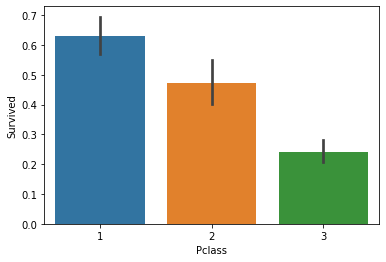

In [ ]:
# survival ratio Pclass
sns.barplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

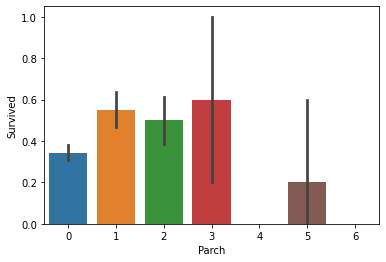

In [ ]:
sns.barplot(x='Parch',y='Survived',data=df)

In [ ]:
cat_col = ['Sex','Embarked']
dfc = df.copy()
dfc[cat_col] = dfc[cat_col].astype('category')

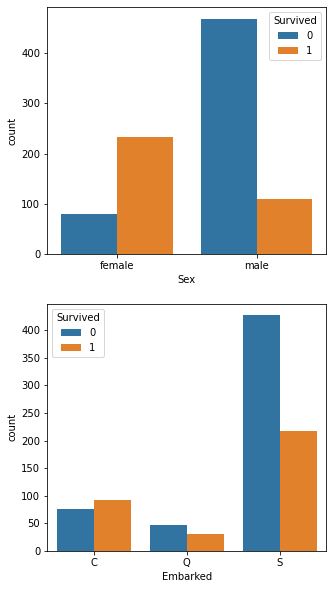

In [ ]:
f, ax = plt.subplots(len(cat_col),1,figsize=(5,10))
for idx, col in enumerate(cat_col):
    sns.countplot(x=col, data=dfc, hue='Survived', ax=ax[idx])

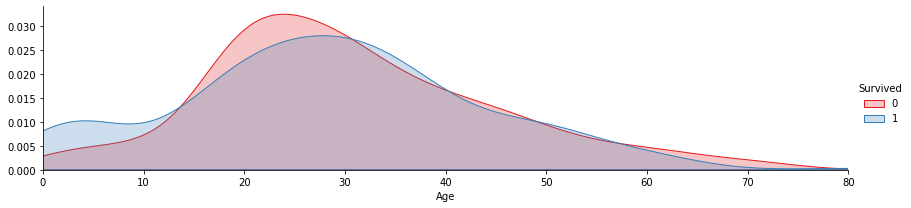

In [ ]:
# using age
a = sns.FacetGrid(df, hue='Survived', palette='Set1', aspect=4)
a.map(sns.kdeplot,'Age',shade=True)
a.set(xlim=(0,df['Age'].max()))
a.add_legend()

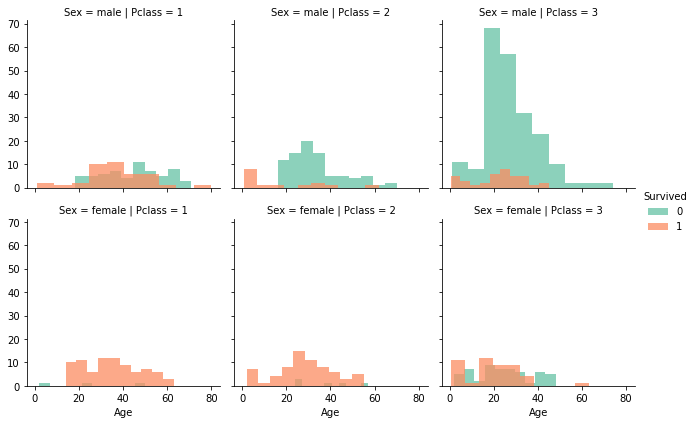

In [ ]:
b = sns.FacetGrid(df, row='Sex', col='Pclass', hue='Survived', palette='Set2')
b.map(plt.hist,'Age',alpha=0.75)
b.add_legend()

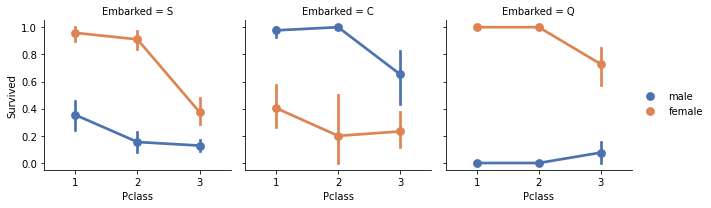

In [ ]:
c = sns.FacetGrid(df, col='Embarked')
c.map(sns.pointplot,'Pclass','Survived','Sex', palette='deep')
c.add_legend()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

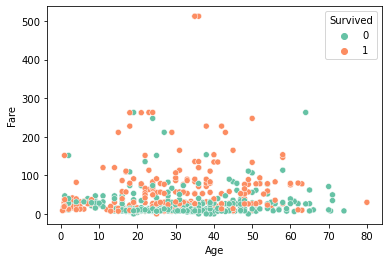

In [ ]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',palette='Set2',sizes=(20,30),hue_norm=(0,7),legend='full',data=df)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

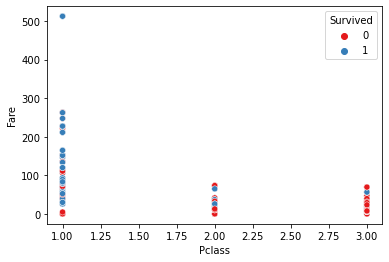

In [ ]:
sns.scatterplot(x='Pclass',y='Fare',hue='Survived',palette='Set1',data=df)

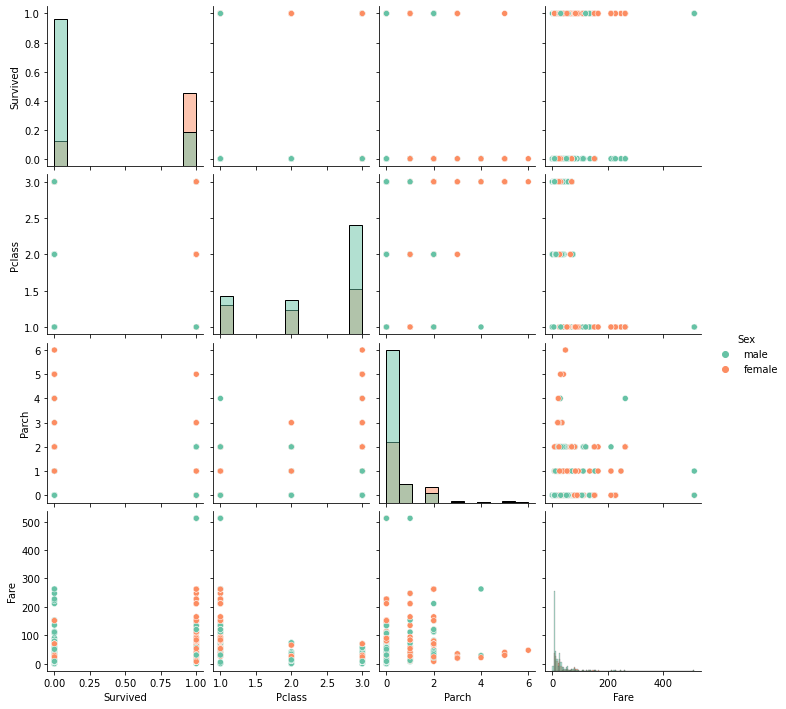

In [ ]:
cols = ['Survived','Pclass','Parch','Fare','Sex']
sns.pairplot(df[cols],diag_kind='hist',hue='Sex',palette='Set2')

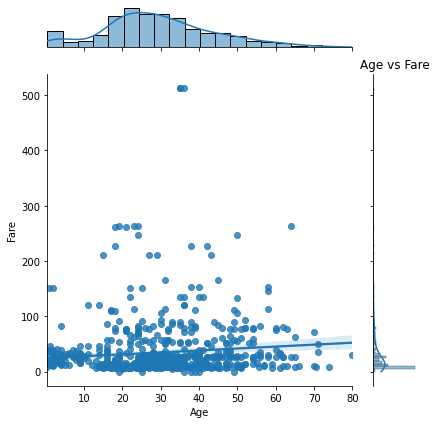

In [ ]:
sns.jointplot(df['Age'],df['Fare'],kind='reg')
plt.title('Age vs Fare')
plt.tight_layout()
plt.show()

In [ ]:
df1 = df.copy()

In [ ]:
# approach 1: mean & standard deviation
Age = [df1]

for dfa in Age:
    mean = dfa['Age'].mean()
    std = dfa['Age'].std()
    is_null =  dfa['Age'].isnull().sum()
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # filling missing values
    age_nan = dfa['Age'].copy()
    age_nan[np.isnan(age_nan)] = rand_age
    dfa['Age'] = age_nan
    dfa['Age'] = df1['Age'].astype(int)
df1['Age'].isnull().sum()

0

In [ ]:
# imputations
df1 = df['Age'].isnull()
df2 = pd.DataFrame(df1)
df2.columns = ['new']
df2.head()

,new
0,False
1,False
2,False
3,False
4,False


In [ ]:
df3 = df[df2['new']==True]
df4 = df[df2['new']==False]
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [ ]:
! pip3 install datawig

     |████████████████████████████████| 61 kB 35 kB/s  eta 0:00:011
     |████████████████████████████████| 11.0 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 13.5 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 24.4 MB 2.4 MB/s eta 0:00:01    |█████████▍                      | 7.2 MB 2.3 MB/s eta 0:00:08     |█████████████████▉              | 13.6 MB 2.5 MB/s eta 0:00:05
     |████████████████████████████████| 30.7 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 28.7 MB 2.6 MB/s eta 0:00:012
  Created wheel for datawig: filename=datawig-0.2.0-py3-none-any.whl size=72676 sha256=33db751ec019e7d5697f0aad83e31f17363abefbe3c5f364ae9e4ddb7998552a
  Stored in directory: /Users/Sergio/Library/Caches/pip/wheels/23/44/aa/12cf6e868f0d71e3c4e57796330094461ade4cb3f1a3acd6c4
Successfully built datawig
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.2
    U

In [ ]:
import datawig

In [ ]:
# simple imputer
imputer = datawig.SimpleImputer(input_columns=['Pclass','Parch','Survived'],output_column='Age',output_path='imputer_model')

In [ ]:
imputer.fit(train_df=df4,num_epochs=50)

2021-03-22 10:29:52,873 [INFO]  
========== start: fit model
2021-03-22 10:29:52,875 [WARNING]  Already bound, ignoring bind()
2021-03-22 10:29:52,933 [INFO]  Epoch[0] Batch [0-21]	Speed: 7550.02 samples/sec	cross-entropy=16.280427	Age-accuracy=0.000000
2021-03-22 10:29:52,988 [INFO]  Epoch[0] Train-cross-entropy=14.726539
2021-03-22 10:29:52,990 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2021-03-22 10:29:52,992 [INFO]  Epoch[0] Time cost=0.111
2021-03-22 10:29:53,001 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2021-03-22 10:29:53,019 [INFO]  Epoch[0] Validation-cross-entropy=14.551150
2021-03-22 10:29:53,019 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2021-03-22 10:29:53,171 [INFO]  Epoch[1] Batch [0-21]	Speed: 2588.34 samples/sec	cross-entropy=13.771882	Age-accuracy=0.000000
2021-03-22 10:29:53,224 [INFO]  Epoch[1] Train-cross-entropy=12.890516
2021-03-22 10:29:53,227 [INFO]  Epoch[1] Train-Age-accuracy=0.000000
2021-03-22 10:29:53,231 [INFO]  Epoch[1] Time 

In [ ]:
imputed = imputer.predict(df3)

In [ ]:
imputed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_imputed
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,26.620655
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,35.203503
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,24.934390
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,26.620655
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,24.934390


In [ ]:
imputed['Age_imputed'].isnull().sum()

0

In [ ]:
del imputed['Age']

In [ ]:
imputed = imputed.rename(columns={'Age_imputed':'Age'})

In [ ]:
imputed = imputed[['PassengerId','Survived','Pclass','Name','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]

In [ ]:
df5 = imputed.append(df4)

In [ ]:
df5.sort_values(by=['PassengerId'])

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000,NaN,S,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000,B42,S,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000,C148,C,26.0


In [ ]:
# using statistics
df6 = df.copy()

In [ ]:
df_corr = df6.corr().abs().unstack().sort_values(kind='quicksort',ascending=False).reset_index()

In [ ]:
df_corr.rename(columns={"level_0":"Feature 1","level_1":"Feature 2",0:'Correlation Coeficient'},inplace=True)

In [ ]:
df_corr[df_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coeficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
32,Age,Survived,0.077221
36,Age,PassengerId,0.036847


In [ ]:
age_by_pclass = df6.groupby(['Sex','Pclass']).median()['Age']

In [ ]:
age_by_pclass

Sex     Pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: Age, dtype: float64

In [ ]:
df6['Age'] = df6.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [ ]:
df6_null = df6.isnull().sum()
df6_null

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
freq = 'S'
emb = [df6]

for e in emb:
    e['Embarked'] = e['Embarked'].fillna(freq)

In [ ]:
feature = [df6]
min_fea = 10

In [ ]:
for data in feature:
    data["Title"] = data['Name'].str.split(', ',expand=True)[1].str.split('.',expand=True)[0]

In [ ]:
title = (df6['Title'].value_counts() < min_fea)

In [ ]:
df6['Title'] = df6["Title"].apply(lambda x: 'Misc' if title.loc[x] == True else x)

In [ ]:
df6['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [ ]:
sur_female = df6[df6.Sex == 'female'].groupby(['Sex','Title'])['Survived'].mean()

In [ ]:
sur_female

Sex     Title
female  Misc     1.000000
        Miss     0.697802
        Mrs      0.792000
Name: Survived, dtype: float64

In [ ]:
sur_male = df6[df6.Sex == 'male'].groupby(['Sex','Title'])['Survived'].mean()

In [ ]:
sur_male

Sex   Title 
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64

In [ ]:
feat = [df6]
titles = {'Mr':1,'Miss':2,'Mrs':3,'Master':4,'Misc':5}

In [ ]:
for dt in feat:
    dt['Title'] = dt['Title'].map(titles)
df6['Title'].value_counts()

1    517
2    182
3    125
4     40
5     27
Name: Title, dtype: int64

In [ ]:
pd.qcut(df6['Age'],5).value_counts()

(20.0, 25.0]     258
(30.0, 40.0]     185
(0.419, 20.0]    179
(40.0, 80.0]     150
(25.0, 30.0]     119
Name: Age, dtype: int64

In [ ]:
pd.cut(df6['Age'],5).value_counts()

(16.336, 32.252]    493
(32.252, 48.168]    218
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

In [ ]:
pd.qcut(df6['Fare'],5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [ ]:
pd.cut(df6['Fare'],5).value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

In [ ]:
age_bin = [df6]
for dta in age_bin:
    dta['Age'] = dta['Age'].astype(int)
    dta.loc[dta['Age'] <= 20, 'Age'] = 0
    dta.loc[(dta['Age'] > 20) & (dta['Age'] <= 25), 'Age'] = 1
    dta.loc[(dta['Age'] > 25) & (dta['Age'] <= 30), 'Age'] = 2
    dta.loc[(dta['Age'] > 30) & (dta['Age'] <= 40), 'Age'] = 3
    dta.loc[(dta['Age'] > 40) & (dta['Age'] <= 80), 'Age'] = 4
df6['Age'].value_counts()

1    257
3    185
0    180
4    148
2    121
Name: Age, dtype: int64

In [ ]:
fare_bin = [df6]
for dta in fare_bin:
    dta['Fare'] = dta['Fare'].astype(int)
    dta.loc[dta['Fare'] <= 7.854, 'Fare'] = 0
    dta.loc[(dta['Fare'] > 7.854) & (dta['Fare'] <= 10.5), 'Fare'] = 1
    dta.loc[(dta['Fare'] > 10.50) & (dta['Fare'] <= 21.679), 'Fare'] = 2
    dta.loc[(dta['Fare'] > 21.679) & (dta['Fare'] <= 39.688), 'Fare'] = 3
    dta.loc[(dta['Fare'] > 39.688) & (dta['Fare'] <= 513), 'Fare'] = 4
df6['Fare'].value_counts()

0    241
3    180
4    176
2    171
1    123
Name: Fare, dtype: int64

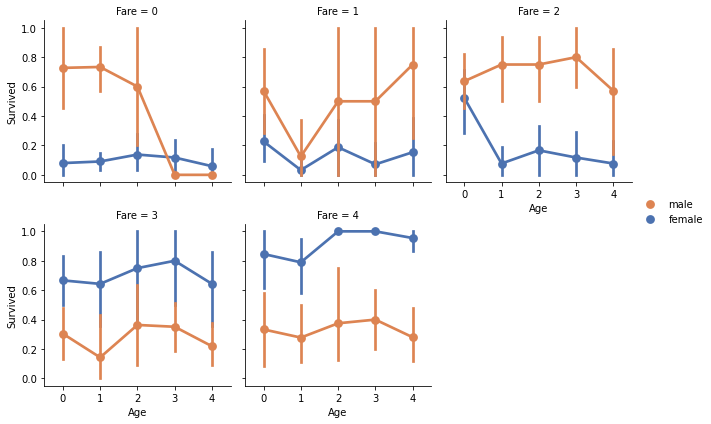

In [ ]:
fig = sns.FacetGrid(df6,col='Fare',col_wrap=3)
fig.map(sns.pointplot,'Age','Survived','Sex',palette='deep')
fig.add_legend()

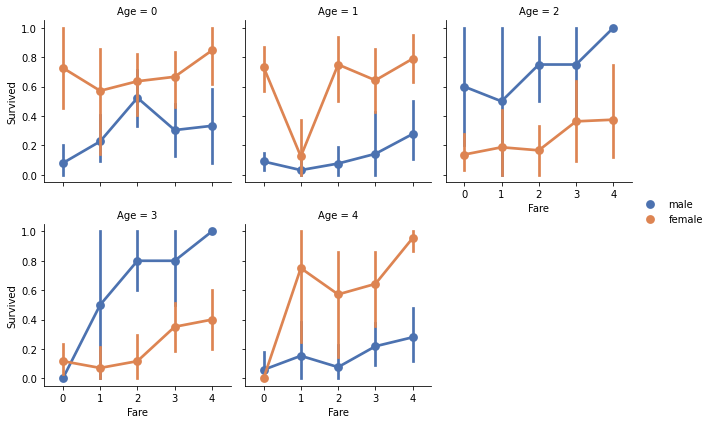

In [ ]:
fig = sns.FacetGrid(df6,col='Age',col_wrap=3)
fig.map(sns.pointplot,'Fare','Survived','Sex',palette='deep')
fig.add_legend()

In [ ]:
df6['Deck'] = df6['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')
df_deck = df6.groupby(['Deck','Pclass']).count().drop(columns=['Survived','Sex','Age','Parch','SibSp','Fare','Embarked','Cabin','PassengerId','Ticket','Title']).rename(columns={'Name':'Count'}).transpose()
df_deck

Deck     A   B   C   D      E        F     G   M            T
Pclass   1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
Count   15  47  59  29  4  25  4  3  8  5  4  40  168  479  1

In [ ]:
deck = df6[df6['Deck']=='T'].index
df6.loc[deck,'Deck']='M'

In [ ]:
female_mean = df6[df6.Sex=='female'].groupby(['Sex','Pclass','Embarked','Fare'])['Survived'].mean()
female_mean

Sex     Pclass  Embarked  Fare
female  1       C         3       0.750000
                          4       1.000000
                Q         4       1.000000
                S         3       1.000000
                          4       0.954545
        2       C         2       1.000000
                          3       1.000000
                          4       1.000000
                Q         2       1.000000
                S         1       0.875000
                          2       0.880000
                          3       0.937500
                          4       1.000000
        3       C         0       1.000000
                          2       0.529412
                          3       1.000000
                Q         0       0.750000
                          1       0.500000
                          2       0.750000
                          3       0.666667
                S         0       0.550000
                          1       0.235294
                       

In [ ]:
male_mean = df6[df6.Sex=='male'].groupby(['Sex','Pclass','Embarked','Fare'])['Survived'].mean()
male_mean

Sex   Pclass  Embarked  Fare
male  1       C         3       0.375000
                        4       0.423077
              Q         4       0.000000
              S         0       0.000000
                        3       0.447368
                        4       0.314286
      2       C         2       0.250000
                        3       0.200000
                        4       0.000000
              Q         2       0.000000
              S         0       0.000000
                        1       0.125000
                        2       0.155556
                        3       0.240000
                        4       0.000000
      3       C         0       0.133333
                        1       0.333333
                        2       0.500000
              Q         0       0.074074
                        1       0.000000
                        2       0.000000
                        3       0.142857
              S         0       0.104839
                        1   

In [ ]:
target = ['Survived']
corr_cols = ['Sex','Pclass','Embarked','Title','SibSp','Age','Parch','Fare']
for corr in corr_cols:
    if df6[corr].dtype != 'float64':
        print('Survived Corr by:',corr)
        print(df6[[corr,target[0]]].groupby(corr,as_index=False).mean())
        print('-'*20,'\n')

Survived Corr by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------- 

Survived Corr by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------- 

Survived Corr by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
-------------------- 

Survived Corr by: Title
   Title  Survived
0      1  0.156673
1      2  0.697802
2      3  0.792000
3      4  0.575000
4      5  0.444444
-------------------- 

Survived Corr by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
-------------------- 

Survived Corr by: Age
   Age  Survived
0    0  0.455556
1    1  0.295720
2    2  0.380165
3    3  0.448649
4    4  0.371622
-------------------- 

Survived Corr by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      

In [ ]:
import numpy as np